In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

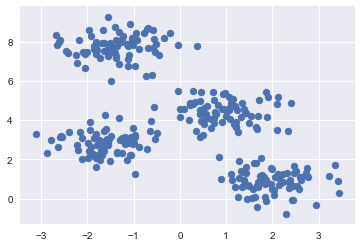

In [5]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                      cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:, 1], s=50)

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [8]:
y_kmeans
print(X)

[[  8.36856841e-01   2.13635938e+00]
 [ -1.41365810e+00   7.40962324e+00]
 [  1.15521298e+00   5.09961887e+00]
 [ -1.01861632e+00   7.81491465e+00]
 [  1.27135141e+00   1.89254207e+00]
 [  3.43761754e+00   2.61654166e-01]
 [ -1.80822253e+00   1.59701749e+00]
 [  1.41372442e+00   4.38117707e+00]
 [ -2.04932168e-01   8.43209665e+00]
 [ -7.11099611e-01   8.66043846e+00]
 [ -1.71237268e+00   2.77780226e+00]
 [ -2.67000792e+00   8.35389140e+00]
 [  1.24258802e+00   4.50399192e+00]
 [ -2.22783649e+00   6.89479938e+00]
 [  1.45513831e+00  -2.91989981e-02]
 [  4.53791789e-01   3.95647753e+00]
 [  1.06923853e+00   4.53068484e+00]
 [  2.56936589e+00   5.07048304e-01]
 [ -1.06690610e+00   3.13165795e+00]
 [ -1.07859101e+00   2.20451529e+00]
 [  2.71506328e+00   1.29082190e+00]
 [  1.77710994e+00   1.18655254e+00]
 [  7.34363910e-01   5.03725437e+00]
 [ -1.99648151e+00   2.85164868e+00]
 [ -1.91828017e+00   2.60516867e+00]
 [ -5.55523811e-01   4.69595848e+00]
 [  1.69747910e+00   8.66123282e-01]
 

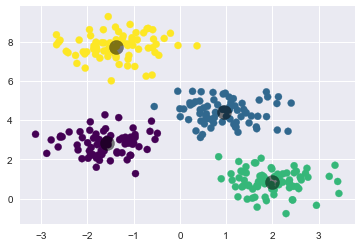

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

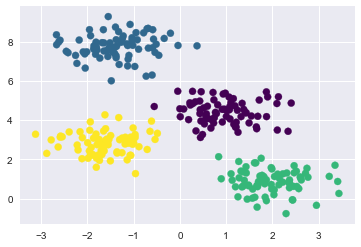

In [12]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        labels = pairwise_distances_argmin(X, centers)
        
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
           s=50, cmap='viridis');

In [16]:
centers, labels = find_clusters(X, 4, rseed=10)

In [17]:
print(centers, labels)

[[-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [ 0.94973532  4.41906906]] [1 2 3 2 1 1 0 3 2 2 0 2 3 2 1 3 3 1 0 0 1 1 3 0 0 3 1 3 0 3 2 2 3 2 2 2 2
 2 0 1 3 0 3 3 0 0 2 0 2 1 0 1 2 1 1 0 2 0 2 1 2 3 2 0 0 0 2 1 2 0 3 0 2 0
 0 2 0 3 1 2 1 3 1 1 2 3 1 3 2 2 3 1 2 0 0 3 1 1 3 0 2 1 2 1 3 1 1 3 2 3 0
 0 1 2 1 3 2 1 1 3 0 1 0 1 1 1 1 0 1 0 2 0 0 1 2 0 0 2 3 2 2 0 3 0 3 0 2 3
 2 2 2 3 2 3 1 0 2 0 1 3 2 3 3 1 3 0 0 3 1 3 3 2 1 3 0 2 1 1 3 0 1 3 0 0 3
 3 3 3 1 2 3 0 3 3 0 0 0 3 0 2 3 0 1 0 3 2 0 2 3 2 3 0 3 3 2 0 0 1 1 3 2 1
 1 0 1 0 3 2 2 3 3 2 3 1 0 3 1 0 2 0 1 3 1 2 2 2 2 0 0 2 3 0 1 3 0 0 0 1 1
 2 3 3 0 1 2 0 3 2 3 1 1 0 0 3 1 1 1 3 2 2 1 1 3 1 1 1 2 0 2 3 1 1 2 2 2 1
 1 3 2 0]


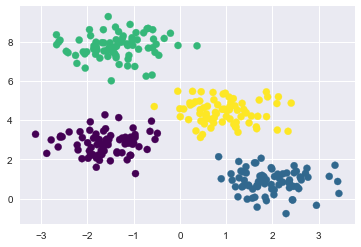

In [18]:
plt.scatter(X[:,0], X[:, 1], c=labels,
           s=50, cmap='viridis');

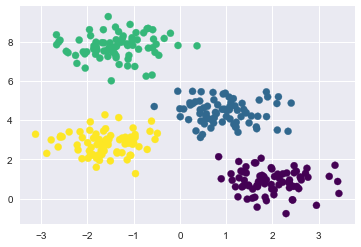

In [20]:
labels = KMeans(4, random_state=0).fit_predict(X)
plt.scatter(X[:,0], X[:, 1], c=labels,
           s=50, cmap='viridis');

In [26]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

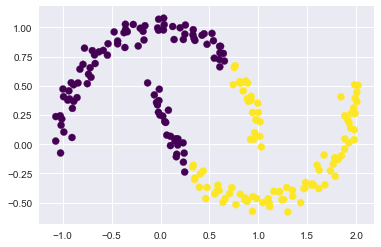

In [27]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
           s=50, cmap='viridis')

C:\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


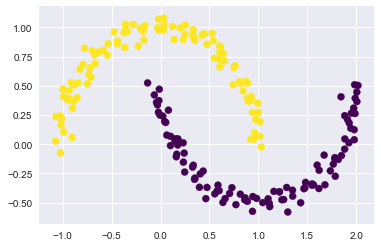

In [28]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
           s=50, cmap='viridis')

## 5.11.3 Examples

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [31]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

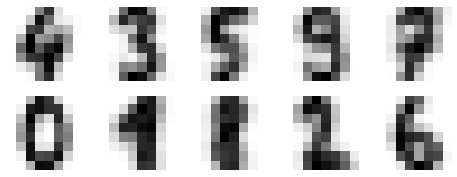

In [32]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [34]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.79354479688369506

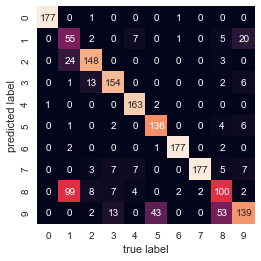

In [37]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

kmeans=KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
accuracy_score(digits.target, labels)

0.9326655537006121

## Example2 k-means for color compression

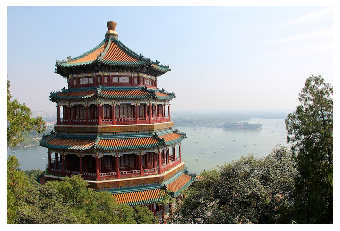

In [39]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [40]:
china.shape

(427, 640, 3)

In [41]:
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [42]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
        
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20)

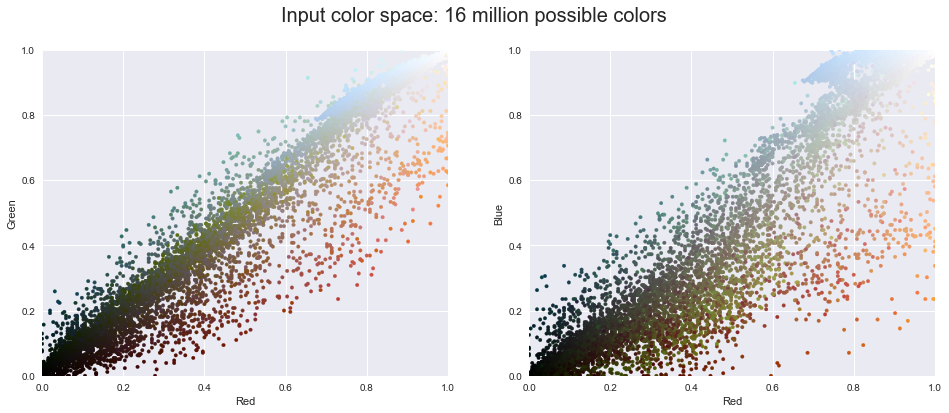

In [43]:
plot_pixels(data, title='Input color space: 16 million possible colors')

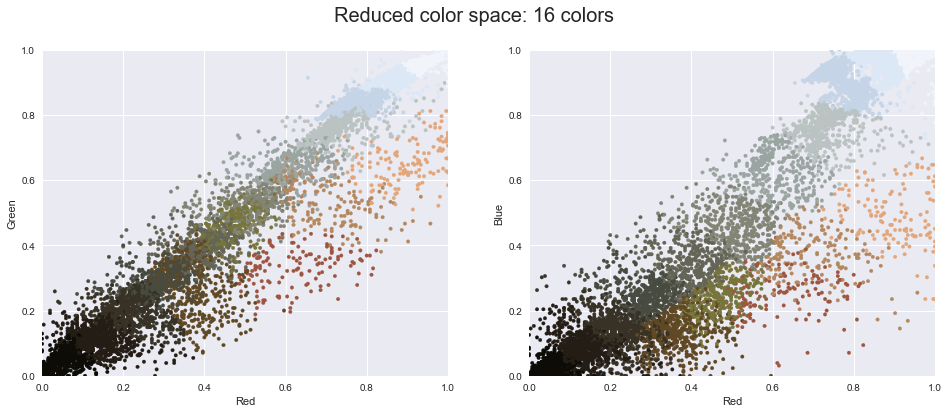

In [44]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
           title='Reduced color space: 16 colors')

Text(0.5,1,'16-color Image')

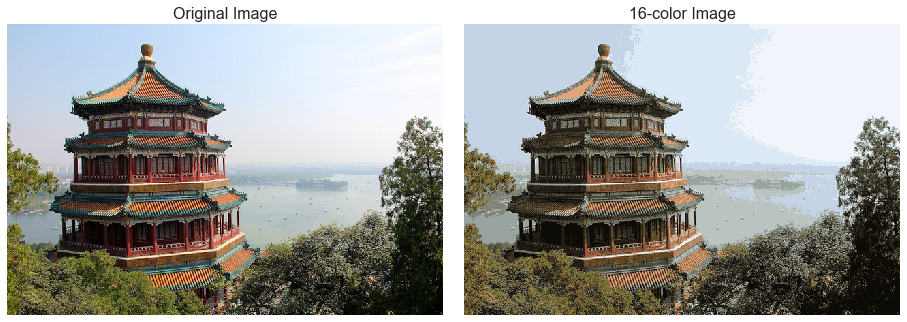

In [45]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                      subplot_kw = dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)